reference  
[더빈왓슨검정](https://zephyrus1111.tistory.com/101)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  ##warning sign 출력 무시
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.5f' % x)  ##scientific notation 삭제
plt.rcParams['font.family'] = 'Malgun Gothic'  ##한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False    ##마이너스기호 깨짐 방지

In [33]:
## 사용할 데이터 불러오기 (보스턴 집값 데이터)
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


1. 단순회귀
2. 다중회귀
3. 다항회귀
4. 정규화선형회귀
    - Ridge
    - Lasso
    - ElasticNet

회귀분석의 유형
--------
1. 독립변수의 수
- 단순회귀: 독립변수와 종속변수가 각각 한 개씩이면서 모두 수치형인 경우
- 다중회귀: 한 개의 수치형 종속변수와 2개 이상의 독립변수
2. 독립변수의 척도
- 일반회귀: 등간,비율척도
- 더미변수를 활용한 회귀: 명목, 서열척도
3. 독립변수와 종속변수의 관계
- 선형회귀: 관계가 선형
- 비선형회귀: 관계가 비선형
  
회귀분석의 전제조건
----
1. 선형성(선형회귀인 경우)
   - 선형성 불만족시 데이터를 변환(로그/지수/루트)
   - 선형성을 만족하지 않는 변수를 제거
   - 변수를 전부 포함하여 모델을 만든 뒤 변수선택법으로 처리
2. 등분산성
    - 잔차가 동일한 분산을 가짐
    - 분산이 같다는 것은 특정한 패턴 없이 고르게 분포했다는 의미임(패턴이 있는 경우 고려하지 못한 새로운 변수가 있는 것으로 파악할 수 있음)
3. 독립성(다중회귀인 경우)  
    - 잔차들은 서로 독립(독립변수 간에 상관관계가 없어야 함)    
    - 잔차의 상관성은 Durbin-Watson 통계량을 이용  
        - Stepwise 변수선택을 이용해 다중공선성을 일으키는 변수들을 제거
        - VIF를 값을 이용해 20보다 높은 값을 제거
4. 정규성
    - 잔차가 정규분포를 따름.
        - Shapiro-Wilk Test

## 단순회귀분석
1. 사이킷런의 linear_model 클래스
- 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정방식으로 구현한 클래스
- OLS 기반 회귀계수 계산은 입력 피처의 독립성에 민감하기 때문에, 독립변수 간 상관관계가 높은 경우 분산이 커져서 오류에 민감해짐 (다중공선성 문제)  
    독립변수 간 상관성이 높은 경우, 중요 변수만 남기고 제거하거나 규제를 적용. 또는 차원축소(PCA 등)를 수행해 다중공선성을 제거할 수 있음
- LinarRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = None, positive = False)
    - fit_intercept : intercept항을 모델에 포함할지 여부를 결정한다
    - noramlize: intercept항이 없으면 False로 지정됨. True일 시, 회귀분석 적합 전 X를 표준화($X-m\over\sigma$)한다
    - True일 시, X는 새 값으로 복사되어 적합되고 ,아닐 시 원 데이터에 overwrite됨
    - positive: True일 시, 회귀계수를 모두 양수로 만든다. 이 옵션은 dense array(모든 값이 0이 아니어야 함)에만 적용됨
2. statsmodels의 formula.api 모듈
- 모델객체이름 = ols(formula = '종속변수 ~ 독립변수', data).fit()
- 모델객체이름.summary()

단순회귀분석 예시(sklearn)  
Step1. 선형성 확인

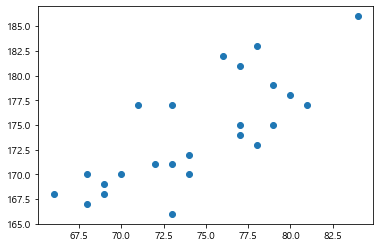

In [6]:
height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]
body = pd.DataFrame({'height':height, 'weight':weight})

plt.plot(body['weight'], body['height'], 'o')
plt.show()

Step2. 모델 적합

In [8]:
from sklearn.linear_model import LinearRegression

X = body['weight'].values.reshape(-1,1)  ##LR 모듈의 X input은 2d array여야 하기 때문에, 단순회귀의 경우 차원증가 과정 필요
y = body['height']

LRmodel = LinearRegression()
LRmodel.fit(X,y)

print('회귀계수:', LRmodel.coef_)
print('절편:', LRmodel.intercept_)
print('R2 Score:', LRmodel.score(X,y))

회귀계수: [0.89042657]
절편: 107.86242266362743
R2 Score: 0.589307547360854


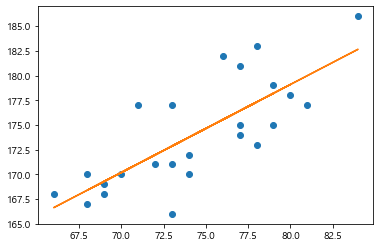

In [9]:
## 적합된 회귀선 확인
plt.plot(X,y,'o')
plt.plot(X,LRmodel.predict(X))
plt.show()

In [12]:
import statsmodels.formula.api as smf

## 단순회귀분석 실행하고 분석결과 출력
LRmodel2 = smf.ols(formula = 'height ~ weight', data = body).fit()
LRmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     31.57
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           1.20e-05
Time:                        10:11:59   Log-Likelihood:                -63.655
No. Observations:                  24   AIC:                             131.3
Df Residuals:                      22   BIC:                             133.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.8624     11.816      9.128      0.000      83.357     132.368
weight         0.8904      0.158      5.619      0.000       0.562       1.219
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.829
Skew:                           0.329   Prob(JB):                        0.661
Kurtosis:                       2.371   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Statsmodel 결과 해석  
1. 첫번째 테이블 - 회귀모형 전체에 대한 사항을 요약
- AIC, BIC는 복수의 모형으로 적합도를 비교할 때 사용하는데, 일반적으로 해당 통계량이 작을수록 더 좋은 모형으로 판단됨
    (현재 예제는 1개 모형만 사용했으므로 해당사항 없음)
- F-Statistic 및 유의확률: 해당 회귀모형 전체의 적합도를 나타냄  
 
2. 두번째 테이블 - 모형에 의해 추정된 회귀계수들의 정보를 요약
3. 세번째 테이블 - 잔차의 정보를 요약 (사후검증용)
    - Omnibus: 잔차의 왜도와 첨도를 이용한 검정통계량. 0에 가까울수록 정규분포에 근사함
    - Prob(Omnibus): Omnibus 값을 이용해 H0: 하의 p-value를 보여줌
    - JB, Prob(JB): Omnibus와 마찬가지로 잔차의 왜도와 첨도를 이용해 정규성을 검정함
    - Skew: 왜도, Kurtois: 첨도
    - Durbin-Watson: 독립성을 검증하는 검정 통계량. 0~4의 값이 출력되며 2에 가까우면 독립성을 지님
    - Cond.No(Condition Number): 30을 넘으면 다중공선성이 존재한다고 판단함

statsmodel Linear Regression으로 얻을 수 있는 결과값
- 절편: model.params.Intercept
- 기울기: model.params.Lot_size
- 절편: model.fittedvalues
- 잔차: model.resid
- 예측값: model.predict(exog = dict(변수명 = 변수array))

잔차분석
1. 모형의 선형성 (residual plot 잔차산점도를 통해 확인)
- 이상적인 모형에서 잔차산점도는 -3과 3 사이에 고르게 퍼져있고, 잔차산점도의 회귀선 기울기가 0이 되어야 한다
- 빨간 실선은 잔차의 추세를 나타내며, 이 값이 0을 기준으로 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것으로 선형성이

Text(0, 0.5, 'residual')

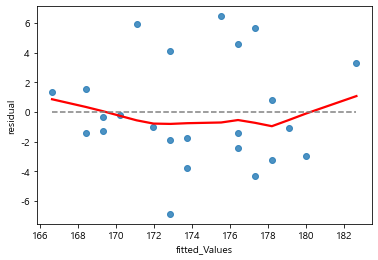

In [15]:
sns.regplot(LRmodel2.fittedvalues, LRmodel2.resid, lowess = True, line_kws ={'color':'red'})
plt.plot([LRmodel2.fittedvalues.min(), LRmodel2.fittedvalues.max()], [0,0], '--', color = 'grey')
plt.xlabel('fitted_Values')
plt.ylabel('residual')

2. 잔차의 정규성
- Q-Q Plot을 통해, 잔차가 점선 위에 배치되어있는지 확인한다
    - 각 관측값의 z-score를 계산해 x축에는 z-score값을, 해당 값의 순서통계량을 y축에 그린다.
- 수치적으로는 샤피로윌크 검정의 귀무가설이 지켜지는지 확인한다.

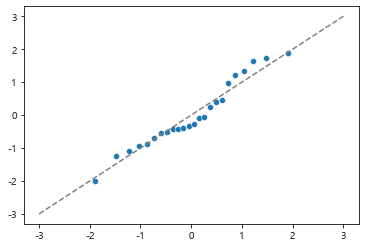

In [22]:
import scipy.stats
sr = scipy.stats.zscore(LRmodel2.resid)
(x,y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--', color = 'grey')

3. 잔차의 등분산성(residual vs predictor plot)
- 예측된 값에 관계없이 모든 값에 대해 잔차의 분산이 동일하다는 가정
- 모형에 특별한 형태가 없으면 모형이 잘 적합된 것으로 봄
- 예측값 vs 표준화된 잔차 값에서 실선이 수평에 가까울수록 등분산성을 지녔다고 말할 수 있음

<AxesSubplot:>

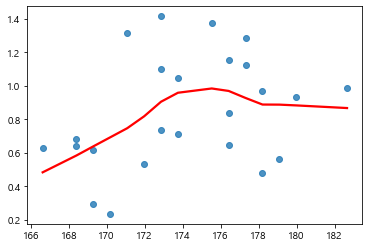

In [23]:
sns.regplot(LRmodel2.fittedvalues, np.sqrt(np.abs(sr)), lowess= True, line_kws = {'color':'red'})

4. 잔차의 독립성
- 2의 값이면 자기상관이 없는 독립성, 0이면 잔차가 양의 자기상관, 4이면 잔차가 음의 자기상관을 갖는다
- 1.5 ~ 2.5 사이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미
- 0 또는 4의 값에 가깝다는 것은 잔차의 자기상관으로 인해 t값, F값, $R^2$ 값을 실제보다 증가시켜 유의미하지 않은 결과를 유의미하게 판단함

5. 극단값
- Cook's distance는 예측에서 많이 벗어난 극단값을 보여줌

In [29]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(LRmodel2).cooks_distance
cd.sort_values(ascending = False).head()

20   0.15829
12   0.10033
22   0.09632
21   0.09170
13   0.08328
dtype: float64

## 다중회귀분석
- X가 두 개 이상인 경우

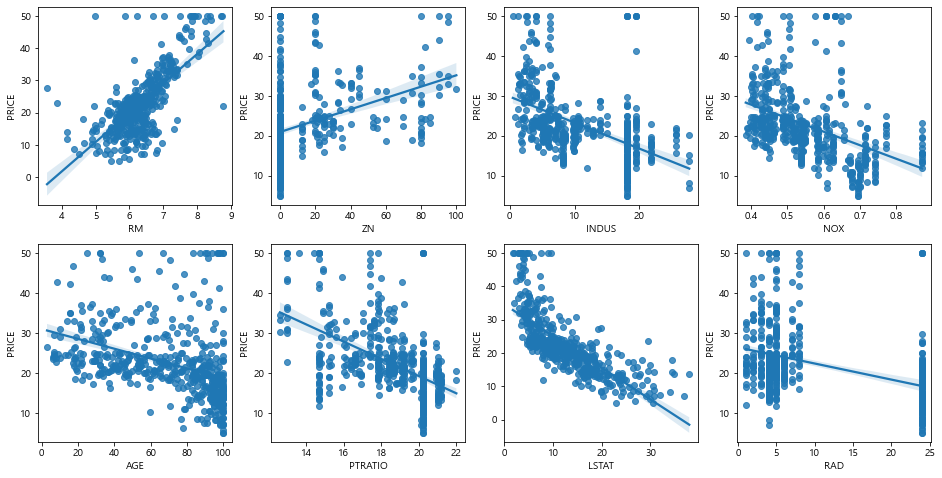

In [70]:
## 각 column이 PRICE에 미치는 영향도 조사
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']   ##연속형변수만 보기
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='PRICE',data=df , ax=axs[row][col])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['PRICE']
X_data = df.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3, random_state = 999)

# Linear Regression OLS로 학습/예측 수행
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)

# 평균제곱오차(MSE, Mean squared error) : 수치가 작을 수록 원본과의 오차가 적은 것
mse = mean_squared_error(y_test, y_preds)

# 평균제곱근오차(RMSE, Root mean squared error) : 수치가 낮을수록 정확도가 높다고 판단
rmse = np.sqrt(mse)

print('MSE : {0:.3f}\nRMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 22.324
RMSE : 4.725
Variance score : 0.709


In [80]:
print('절편 :',lr.intercept_)
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 3), index=X.columns )
coeff.sort_values(ascending=False)

절편 : 40.1598620827294


RM          3.36000
CHAS        1.55700
RAD         0.32800
ZN          0.05300
INDUS       0.01700
B           0.00900
AGE         0.00100
TAX        -0.01200
CRIM       -0.13400
LSTAT      -0.62600
PTRATIO    -0.91600
DIS        -1.70300
NOX       -16.55800
dtype: float64

Cross validation을 이용해 회귀계수 산정하기

In [81]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
# cross_val_score()의 인자로 scoring="neg_mean_squared_error"를 지정하면 반환되는 수치 값은 음수 값이므로 -1을 곱해서 양의 값으로
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2)) # cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 다항회귀
- 독립변수와 종속변수의 관계가 선형이 아닐 때 사용

In [84]:
from sklearn.preprocessing import PolynomialFeatures

## 데이터 만들기
X = 6 * np.random.rand(100,1)-3
y = 0.5 * X **2 + 2 + np.random.randn(100,1)

poly_feature = PolynomialFeatures(degree = 2, include_bias = False)  ## X와 X의 n(degree의 숫자)승수까지의 벡터를 만들어줌
X_poly = poly_feature.fit_transform(X)
print(X[0], X_poly[0])

[-1.709817] [-1.709817    2.92347416]


In [86]:
LRmodel = LinearRegression()
LRmodel.fit(X_poly, y)

LinearRegression()

## 정규화선형회귀
- 선형모델이 학습데이터의 오차를 최소화하는 것만 고려할 경우 회귀계수가 쉽게 커지고, 예측의 성능이 저하되기 쉬움
- 이렇게 학습데이터에서만 성능이 높은 모델을 '과적합'되었다고 말하고, 과적합을 방지하기 위해 회귀계수 산출공식에 제약을 둔다
    -  기존 선형회귀계수 산출 알고리즘     
    -  $MSE(training) = (Y-\hat{Y)}^2 $를 최소화 하는 값  
    - 정규화 선형회귀계수 산출 알고리즘    
    -  $ MSE + alpha * || 회귀계수 W|| $



- 언제 어떤 회귀를 사용해야 하는가?  
  - __변수개수 > 데이터의 양__ : 라쏘 이용  
    라쏘는 주로 변수들이 많은 경우에 변수 선택을 하기 위해 사용
  - __데이터의 양>변수개수__ : 릿지 이용  
    릿지는 변수들 간 다중공선성이 발견될 때 x의 분산을 줄이기 위해 사용 (정보 압축)
  - 엘라스틱넷은 교란변수 A가 있을 때, 실제 영향을 주는 변수인 B만 사라지고 A만 남아있는 상황(라쏘 이용 시)이나 A와 B의 회귀계수가 크게 줄어서 A의 영향력이 과소평가되는 상황(릿지 이용 시)을 피하기 위해 사용

### 1. Ridge 회귀모형
- 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가 제약조건으로 계산.
- 회귀계수의 산정
- $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right)$
- $\lambda$는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼파라미터
    -  $\lambda$가 크면 정규화 정도가 커지고, 가중치(w)의 값들이 작아진다.
    -  $\lambda$가 작아지면 정규화 정도가 작아지며, $\lambda$ 가 0이 되면 일반적인 선형 회귀모형이 된다.
-  가중치(w) 제한 범위
$∑w^2  < t $ 
    -  L2 정규화 : t값이 작아질 수록 가중치에 대한 제약이 커진다  
    -  L2 정규화가 L1 정규화에 비해 더 안정적이라 일반적으로는 L2 정규화가 더 많이 사용된다  
-  x 변수 간 상관관계가 높은 상황(collinearity)에서 좋은 예측성능을 보인다
-  크기가 큰 변수를 우선적으로 줄이려는 경향이 있다

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10) ## alpha는 규제항에 곱해지는 것으로 alpha가 커질수록 회귀계수는 작아짐 (alpha = 회귀식의 람다)
neg_mse_scores = cross_val_score(ridge, X, y, scoring = "neg_mean_squared_error", cv = 5) 
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [47]:
## 규제항에 곱해지는 alpha(=람다) 값의 변화에 따른 정확도, 회귀계수의 크기 변화 측정
alphas = [0, 0.1, 1, 10, 100] ## alpha = 0일때는 규제가 없는 경우와 동일

for alpha in alphas:
  ridge = Ridge(alpha = alpha)

  neg_mse_scores = cross_val_score(ridge, X, y, scoring = "neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha 1 일 때 5 folds의 평균 RMSE: 5.653
alpha 10 일 때 5 folds의 평균 RMSE: 5.518
alpha 100 일 때 5 folds의 평균 RMSE: 5.330


In [50]:
## 최종회귀계수 출력
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X, y)

  coeff = pd.Series(data = ridge.coef_, index = X.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff

print(coeff_df)

          alpha:0  alpha:0.1   alpha:1  alpha:10  alpha:100
CRIM     -0.10801   -0.10747  -0.10460  -0.10144   -0.10220
ZN        0.04642    0.04657   0.04744   0.04958    0.05450
INDUS     0.02056    0.01600  -0.00880  -0.04296   -0.05283
CHAS      2.68673    2.67002   2.55239   1.95202    0.63833
NOX     -17.76661  -16.68465 -10.77701  -2.37162   -0.26285
RM        3.80987    3.81823   3.85400   3.70227    2.33454
AGE       0.00069   -0.00027  -0.00541  -0.01071    0.00121
DIS      -1.47557   -1.45963  -1.37265  -1.24881   -1.15339
RAD       0.30605    0.30352   0.29014   0.27960    0.31536
TAX      -0.01233   -0.01242  -0.01291  -0.01399   -0.01586
PTRATIO  -0.95275   -0.94076  -0.87607  -0.79794   -0.82922
B         0.00931    0.00937   0.00967   0.01004    0.00939
LSTAT    -0.52476   -0.52597  -0.53334  -0.55937   -0.66076


### 2. Lasso 회귀모형
- 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.
- $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)$
- 가중치(w) 제한 범위  $∑|w| < t $
- zero coefficient 를 만드는 것이 가능해진다. 즉, 어떤 독립변수의 경우 아예 사라지게 될 수도 있게 되면서 feature selection을 할 수 있게 된다.
- Lasso 모델에 너무 큰 $\lambda$를 적용하면 대부분의 feature들의 가중치가 0으로 수렴한다 (변수선택에 유용)
- 변수들 간 상관관계가 큰 경우 예측 성능 저하

In [53]:
## Lasso는 Ridge회귀에서 사용했던 식 그대로에서 함수만 바꿔주면 된다.

from sklearn.linear_model import Lasso
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
  lasso = Lasso(alpha = alpha)

  neg_mse_scores = cross_val_score(lasso, X, y, scoring = "neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('Lasso 회귀 alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))


## 최종 회귀계수를 출력
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
  lasso = Lasso(alpha = alpha)
  lasso.fit(X, y)

  coeff = pd.Series(data = lasso.coef_, index = X.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff

print(coeff_df)

Lasso 회귀 alpha 0 일 때 5 folds의 평균 RMSE: 5.829
Lasso 회귀 alpha 0.1 일 때 5 folds의 평균 RMSE: 5.615
Lasso 회귀 alpha 1 일 때 5 folds의 평균 RMSE: 5.776
Lasso 회귀 alpha 10 일 때 5 folds의 평균 RMSE: 6.586
Lasso 회귀 alpha 100 일 때 5 folds의 평균 RMSE: 8.393


### 3. Elastic Net 회귀모형
- 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형
- $w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda_1 \sum_{j=1}^M | w_j | + \lambda_2 \sum_{j=1}^M w_j^2 \right)$
- $\lambda_1$, $\lambda_2$ 두 개의 하이퍼 모수를 가진다.

- 일정 범위 내로 $\lambda_1$, $\lambda_2$를 조정하여, 가장 좋은 예측 결과를 보이는 $\lambda_1$, $\lambda_2$ 값을 선정 (Grid Search)
    - l1_ratio = 0 (L2 규제만 사용)
    - l1_ratio = 1 (L1 규제만 사용)
    - 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)
- $\lambda_1$는 규제의 강도를 조절하는 매개변수, $\lambda_2$는 Lasso 와 Ridge 규제 사이의 가중치를 조절하는 변수
- $\lambda_1$가 0에 가까우면 elasticNet은 Ridge에 가까워지고, $\lambda_1$가 1에 가까우면 elasticNet은 Lasso에 가까워짐
- ElasticNet을 사용하게 되면 Ridge처럼 coefficient의 크기를 줄이는 동시에 Lasso처럼 특정 coefficient를 0으로 만든다. 따라서 feature selection에 효과적임



In [56]:
from sklearn.linear_model import ElasticNet
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
  elasticnet = ElasticNet(alpha = alpha)

  neg_mse_scores = cross_val_score(elasticnet, X, y, scoring = "neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('ElasticNet 회귀 alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))


## 최종 회귀계수를 출력
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
  elasticnet = ElasticNet(alpha = alpha)
  elasticnet.fit(X, y)

  coeff = pd.Series(data = elasticnet.coef_, index = X.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff

print(coeff_df)

ElasticNet 회귀 alpha 0 일 때 5 folds의 평균 RMSE: 5.829
ElasticNet 회귀 alpha 0.1 일 때 5 folds의 평균 RMSE: 5.478
ElasticNet 회귀 alpha 1 일 때 5 folds의 평균 RMSE: 5.522
ElasticNet 회귀 alpha 10 일 때 5 folds의 평균 RMSE: 6.472
ElasticNet 회귀 alpha 100 일 때 5 folds의 평균 RMSE: 8.312
          alpha:0  alpha:0.1  alpha:1  alpha:10  alpha:100
CRIM     -0.10801   -0.10008 -0.08037  -0.00000   -0.00000
ZN        0.04642    0.05138  0.05324   0.04093    0.00000
INDUS     0.02056   -0.04590 -0.01266  -0.00000   -0.00000
CHAS      2.68673    0.98797  0.00000   0.00000    0.00000
NOX     -17.76661   -0.05953 -0.00000   0.00000   -0.00000
RM        3.80987    3.25266  0.93394   0.00000    0.00000
AGE       0.00069   -0.00722  0.02058   0.02007   -0.00000
DIS      -1.47557   -1.18140 -0.76204  -0.00000    0.00000
RAD       0.30605    0.28873  0.30157   0.00000    0.00000
TAX      -0.01233   -0.01495 -0.01644  -0.00895   -0.02135
PTRATIO  -0.95275   -0.79350 -0.74805  -0.00000   -0.00000
B         0.00931    0.00996  0.00834

### 참고) 최적정규화
- 정규화에 사용되는 Hyper parameter 등을 바꾸면 모형의 검증 성능이 달라짐. 따라서 최적의 성능을 가져올 수 있는 하이퍼파라미터 선택이 필요. 이 과정을 수행해주는 것을 optimal regularization이라고 부름

In [43]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


X = df.iloc[:,:-1]  ##학습을 위한 데이터 선택
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

## 최적정규화 수행
linear = LinearRegression().fit(Xtrain, ytrain) ## alpha (default=1.0), l1_ratio (default=0.5)
ridge = Ridge().fit(Xtrain, ytrain)
lasso = Lasso().fit(Xtrain, ytrain)
elastic = ElasticNet().fit(Xtrain, ytrain)

linear_y_hat = linear.predict(Xtest)
ridge_y_hat = ridge.predict(Xtest)
lasso_y_hat = lasso.predict(Xtest)
elastic_y_hat = elastic.predict(Xtest)

linear_r2, ridge_r2, lasso_r2, elastic_r2 = r2_score(ytest,linear_y_hat), r2_score(ytest,ridge_y_hat), r2_score(ytest,lasso_y_hat), r2_score(ytest, elastic_y_hat)
linear_MSE, ridge_MSE, lasso_MSE, elastic_MSE = mean_squared_error(ytest,linear_y_hat), mean_squared_error(ytest,ridge_y_hat), mean_squared_error(ytest,lasso_y_hat), mean_squared_error(ytest, elastic_y_hat)


print('R2 score - Linear: %.2f, Ridge: %.2f, Lasso: %.2f, Elastic Net: %.2f' %(linear_r2, ridge_r2, lasso_r2, elastic_r2))
print('MSE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f,  Elastic Net: %.2f' %(linear_MSE, ridge_MSE, lasso_MSE, elastic_MSE))

R2 score - Linear: 0.65, Ridge: 0.64, Lasso: 0.64, Elastic Net: 0.64
MSE - Linear: 29.70, Ridge: 30.38, Lasso: 30.25,  Elastic Net: 30.26
